In [7]:
import os
import numpy as np
from astropy.io import fits
from astropy.table import Table, Column

In [8]:
import seaborn as sns
sns.set(context='talk', style='ticks', font_scale=1.6)#, rc=rc) 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def read_data(camera='decam'):
    ondiskfile = {
        'decam': '/Users/ioannis/tmp/survey-ccds-decam-dr9-cut.fits',
        'mosaic': '/Users/ioannis/tmp/survey-ccds-mosaic-dr9-cut.fits',
        '90prime': '/Users/ioannis/tmp/survey-ccds-90prime-dr9-cut.fits',
    }
    return Table(fits.getdata(ondiskfile[camera]))

In [13]:
%time mosaic = read_data('mosaic')

In [15]:
%time prime = read_data('90prime')

CPU times: user 1e+03 ms, sys: 170 ms, total: 1.17 s
Wall time: 1.18 s


In [16]:
%time decam = read_data('decam')

CPU times: user 38.6 s, sys: 19 s, total: 57.7 s
Wall time: 1min 7s


In [17]:
set(prime['plver'])

{'V2.3    '}

In [18]:
uplver = sorted(set(np.hstack((decam['plver'].data, mosaic['plver'].data, prime['plver'].data))))
print(len(uplver), uplver)

7 ['V2.3    ', 'V4.3', 'V4.8', 'V4.8.1', 'V4.8.2', 'V4.8.2a', 'V4.8.2a ']


In [19]:
def get_nperver(data):
    """Get the number of images with each PLVER."""
    nperver = [np.sum(data['plver'] == ver) for ver in uplver]
    nperver /= np.sum(nperver)
    return nperver

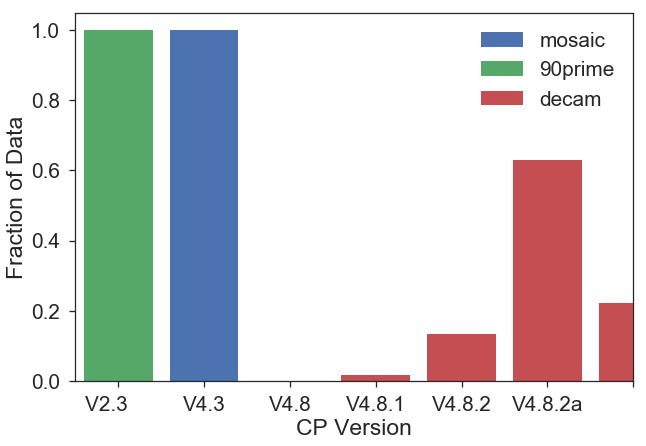

In [23]:
fig, ax = plt.subplots(figsize=(10, 7))
for camera, data in zip(('mosaic', '90prime', 'decam'), (mosaic, prime, decam)):
    nperver = get_nperver(data)
    #print(camera, nperver)
    ax.bar(np.arange(len(uplver)), nperver, label=camera)
ax.set_xlabel('CP Version')
ax.set_ylabel('Fraction of Data')
ax.set_xlim(-0.5, len(uplver)-1)
_ = ax.set_xticklabels([uplver[int(ll)] for ll in ax.get_xticks().tolist()[:-1]])
#_ = ax.set_xticklabels([uplver[int(ll)].decode('utf-8') for ll in ax.get_xticks().tolist()[:-1]])
ax.legend()
plt.subplots_adjust(bottom=0.15)
plt.savefig('dr9-plver-distribution.png')
#ax.get_xticks().tolist()
#newlabels = [item.get_text() for item in ax.get_xticklabels()[:-1]]
#print(newlabels)